<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/BJ/%EC%84%BC%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 꿀 따기

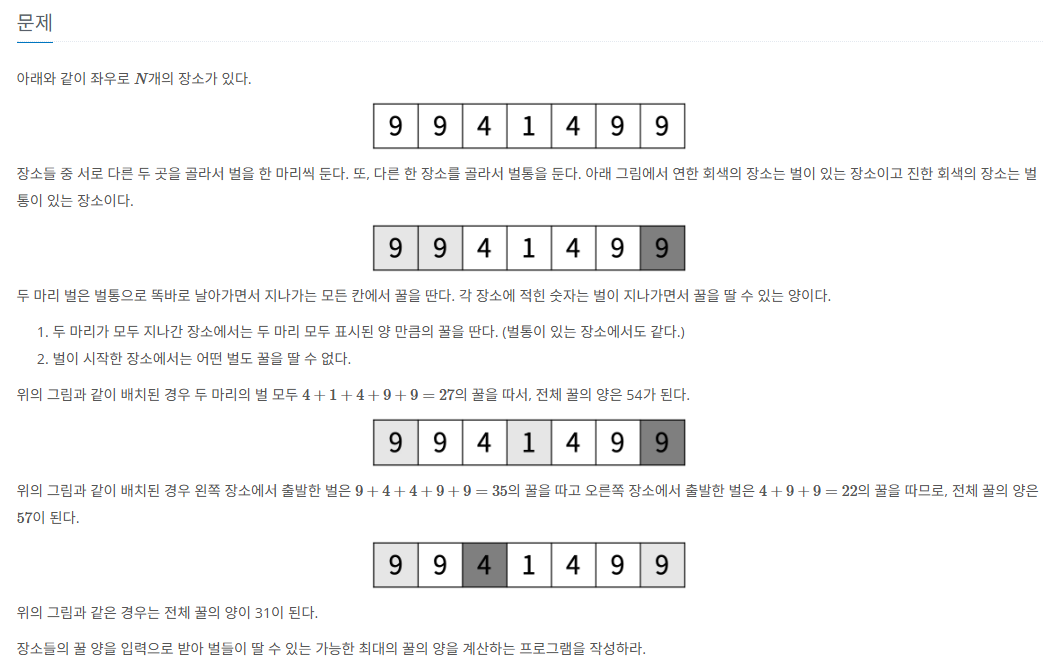

## 입력 출력 및 예제


* 입력

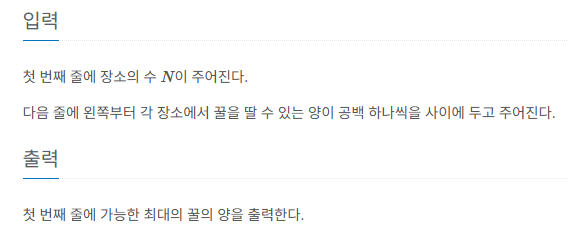

* 출력

* 예제

## 구상

- 벌통, 벌 2마리를 적절히 배치하여 꿀 채집의 최대량 구하기 (2마리 겹치기 불가)
- 모든 경우의 수는 말이 안됨
- 그런데 최대량이 가능한 벌들의 위치는 몇개 안될 것 같은데? 벌의 수도 고정이고
- 방법이 이상하지만, 해보자


## 코드

[1, 2, 3, 4, 1, 2, 3, 4]

In [ ]:
# Fail 방법 자체를 잘못 생각
N = int(input())
honey_list = list(map(int,input().split()))
bees = [[0,1],[-1,-2],[0,-1]]

honey_sum = sum(honey_list)
result_list = [sum(honey_list[2:]) * 2, sum(honey_list[:-2]) * 2, honey_sum - (honey_list[0] + honey_list[-1] + max(honey_list[1:-1]))]
print(result_list)
print(max(result_list))




7
9 9 4 1 4 9 9
[54, 54, 18]
54


In [2]:
# GPT
def solve():
    n = int(input().strip())
    a = list(map(int, input().split()))

    # prefix sum S: S[k] = sum of a[0..k-1]
    S = [0] * (n + 1)
    for i in range(n):
        S[i + 1] = S[i] + a[i]

    def range_sum(l, r):
        # sum a[l..r], assuming l <= r
        return S[r + 1] - S[l]

    # sum of middle cells 1..n-2
    mid = range_sum(1, n - 2)

    ans = 0

    # Case 1: hive at n-1, bee at 0 fixed, other bee at i
    for i in range(1, n - 1):
        # i ranges 1..n-2
        val = (mid - a[i]) + (S[n - 1] - S[i + 1]) + a[n-1] * 2 # sum(i+1..n-2)
        ans = max(ans, val)

    # Case 2: hive at 0, bee at n-1 fixed, other bee at i
    for i in range(1, n - 1):
        val = (mid - a[i]) + (S[i] - S[1]) + a[0] * 2 # sum(1..i-1)
        ans = max(ans, val)

    # Case 3: bees at both ends, hive at i
    for i in range(1, n - 1):
        val = (S[i] - S[1]) + (S[n - 1] - S[i + 1]) + a[i] * 2 # sum(1..i-1) + sum(i+1..n-2)
        ans = max(ans, val)

    print(ans)

solve()


7
9 9 4 1 4 9 9
57


### 메모
- 멎는 접근법이였는데 포기한게 아쉽다.
- 누적합
- gpt가 틀린것 수정(벌통 계산에 미포함)


*